In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.shape

(5634, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churned
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,0
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,0
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,0
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7,0
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,0


In [ ]:
df.info()

In [ ]:
df.columns

In [6]:
df = df.drop(columns=['customerID'])

In [ ]:
df.head()

In [7]:
print(df['gender'].unique())
print(df['Partner'].unique())
print(df['Dependents'].unique)

['Male' 'Female']
['No' 'Yes']
<bound method Series.unique of 0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
5629     No
5630     No
5631     No
5632     No
5633     No
Name: Dependents, Length: 5634, dtype: object>


In [ ]:
print(df['SeniorCitizen'].unique())
print(df['tenure'].unique())

In [8]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')
    print("_"*50)

gender: ['Male' 'Female']
__________________________________________________
SeniorCitizen: [0 1]
__________________________________________________
Partner: ['No' 'Yes']
__________________________________________________
Dependents: ['No' 'Yes']
__________________________________________________
tenure: [35 15 13 26  1 66 40 65 60  5  2 30 36 55 31 28 16  6 27 58 72 12 71  3
 25 52 46  9 19 45 38 10 18 37 11 64 48 20 69 63 39  4 53 51 61  8 24 14
 68 23  7 32 56 43 29 67 50 59 21 47 41 34 57 33 44 70 49 22 42 62 54 17
  0]
__________________________________________________
PhoneService: ['No' 'Yes']
__________________________________________________
MultipleLines: ['No phone service' 'No' 'Yes']
__________________________________________________
InternetService: ['DSL' 'Fiber optic' 'No']
__________________________________________________
OnlineSecurity: ['No' 'Yes' 'No internet service']
__________________________________________________
OnlineBackup: ['No' 'Yes' 'No internet service

In [9]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

In [10]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
churned             0
dtype: int64


In [11]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churned
819,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0
1999,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
2100,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
4710,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
5057,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
5294,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
5361,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,0
5608,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0


In [ ]:
len(df[df["TotalCharges"]==" "])

In [12]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [13]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [ ]:
df.info()

In [14]:
# checking the class distribution of target column
print(df["churned"].value_counts())

churned
0    4139
1    1495
Name: count, dtype: int64


Insights:
  1. Customer ID removed as it is not required for modelling
  2. No mmissing values in the dataset
  3. Missing values in the TotalCharges column were replaced with 0
  4. Class imbalance identified in the target

#Exploratory Data Analysis(EDA)

In [ ]:
df.describe()

In [15]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

In [ ]:
plot_histogram(df, "tenure")

In [ ]:
plot_histogram(df, "MonthlyCharges")

In [ ]:
plot_histogram(df, "TotalCharges")

In [16]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

In [ ]:
plot_boxplot(df, "tenure")

In [ ]:
plot_boxplot(df, "MonthlyCharges")

In [ ]:
plot_boxplot(df, "TotalCharges")

Correlation Headtmap for numerical columns

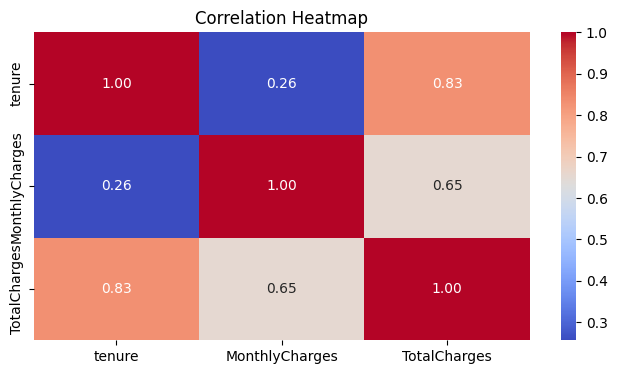

In [17]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Categorical features - Analysis

In [ ]:
df.columns

In [ ]:
df.info()

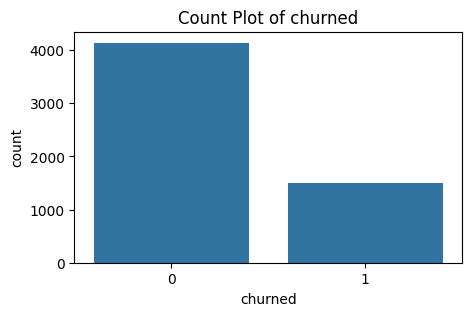

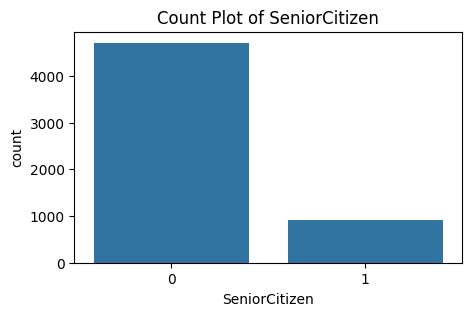

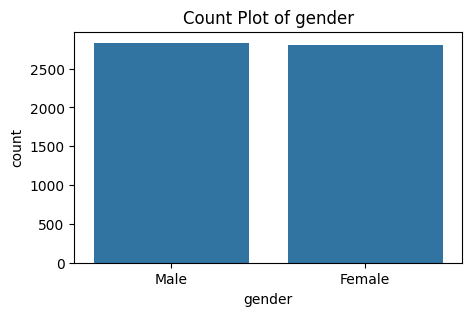

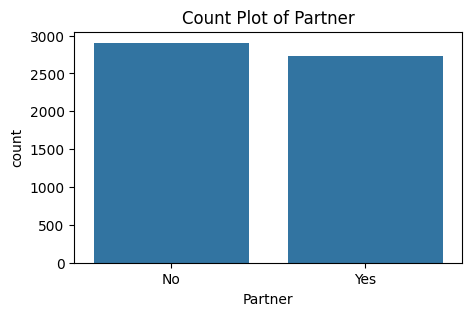

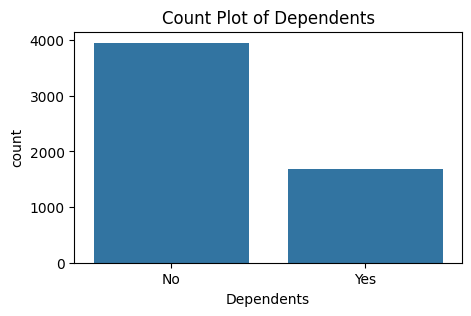

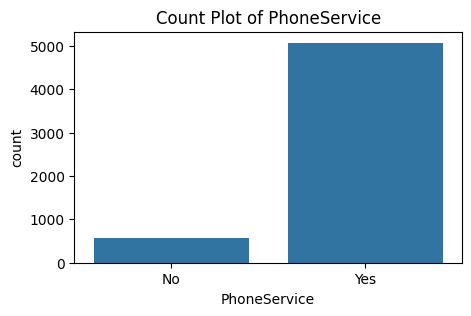

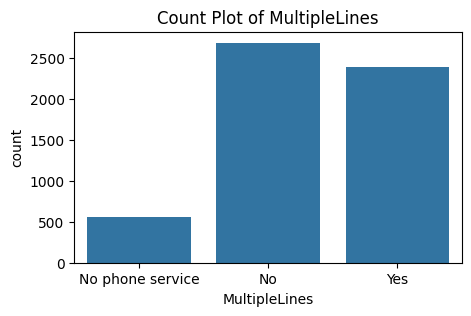

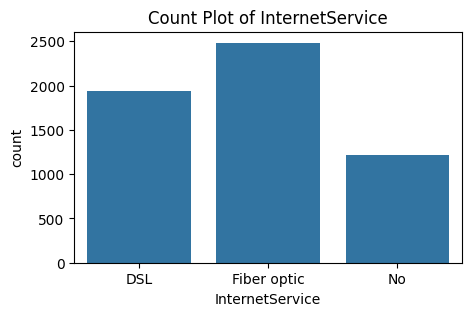

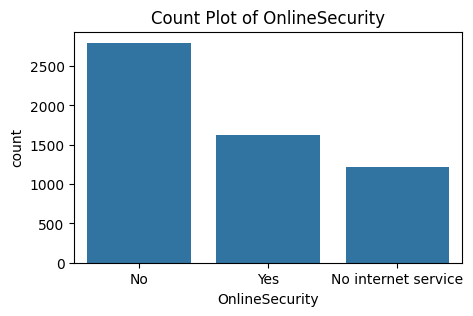

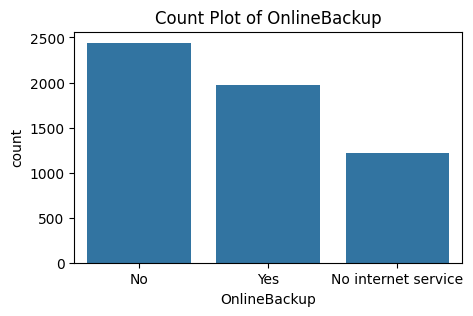

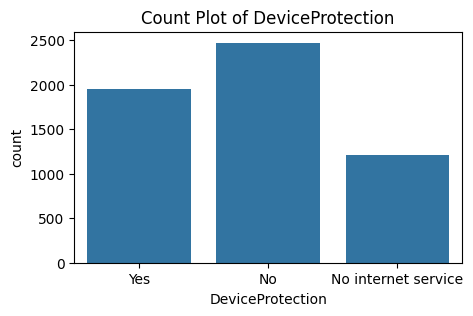

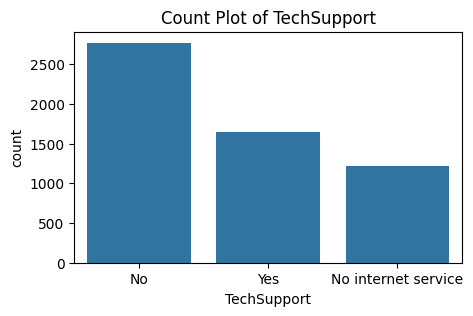

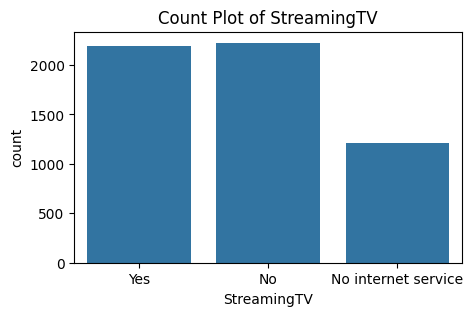

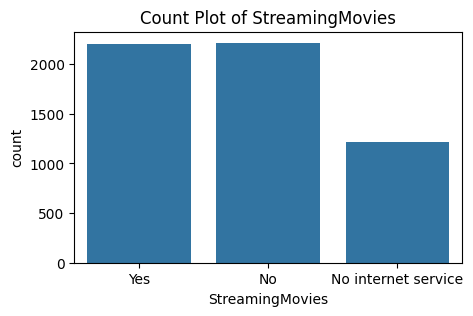

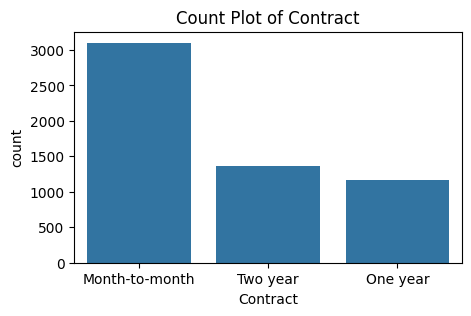

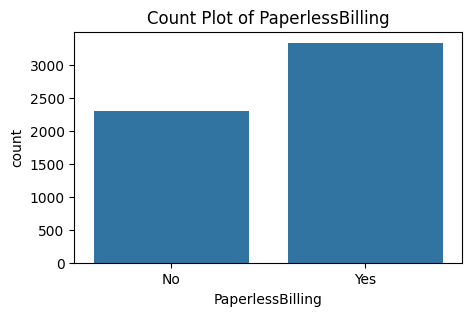

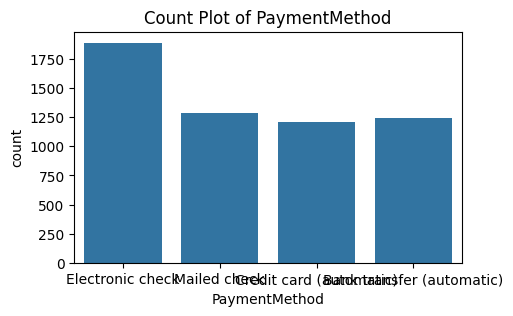

In [18]:
object_cols = df.select_dtypes(include="object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols
object_cols = ["churned"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

In [ ]:
df.head()

Label encoding of the traget column

In [19]:
df['churned'] = df['churned'].replace({'Yes': 1 , 'No':0})

In [ ]:
df.head(2)

In [20]:
print(df['churned'].value_counts())

churned
0    4139
1    1495
Name: count, dtype: int64


Label encoding of categorical features

In [21]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [ ]:
print(object_columns)

In [22]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [ ]:
encoders

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churned
0,1,0,0,0,35,0,1,0,0,0,2,0,2,2,0,0,2,49.20,1701.65,0
1,1,0,1,1,15,1,0,1,2,0,0,0,0,0,0,0,3,75.10,1151.55,0
2,1,0,1,1,13,0,1,0,2,2,0,2,0,0,2,0,3,40.55,590.35,0
3,0,0,1,0,26,1,0,0,0,2,2,0,2,2,2,1,1,73.50,1905.70,0
4,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,2,44.55,44.55,0


In [24]:
#splitting the features and target
X = df.drop(columns=['churned'])
y = df['churned']

In [26]:
df2 = pd.read_csv('test.csv')

In [ ]:
df2.head()

In [27]:
len(df2[df2["TotalCharges"]==" "])

3

In [28]:
df2["TotalCharges"] = df2["TotalCharges"].replace({" ": "0.0"})

In [29]:
df2["TotalCharges"] = df2["TotalCharges"].astype(float)

In [ ]:
df2.info()

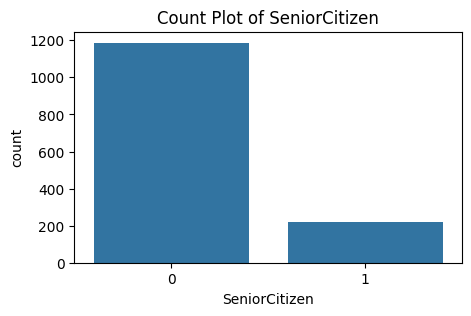

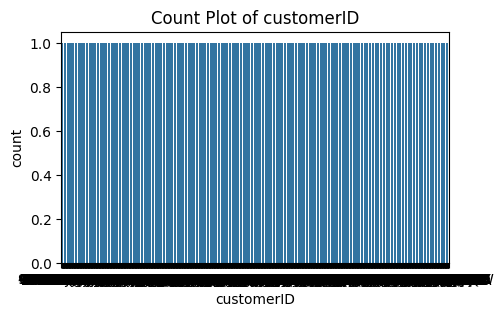

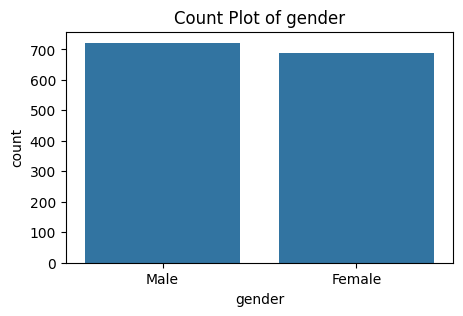

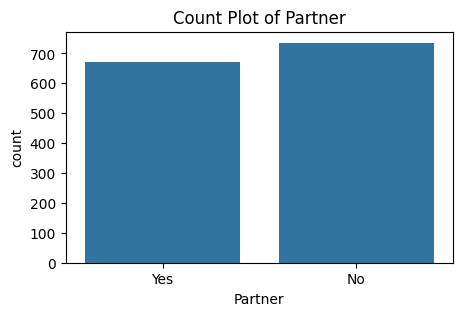

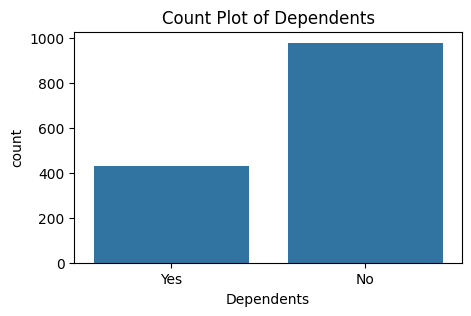

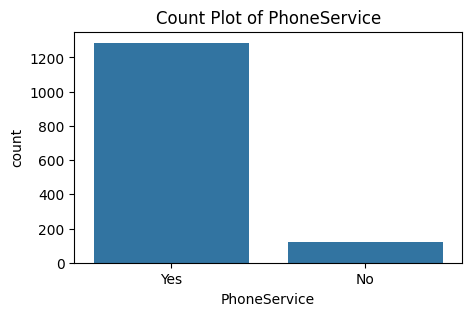

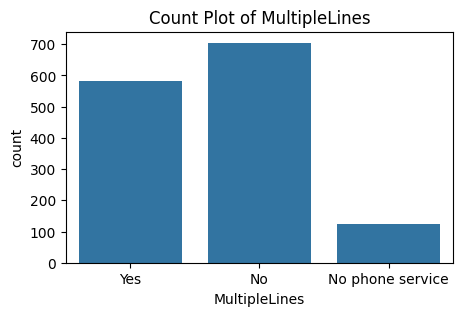

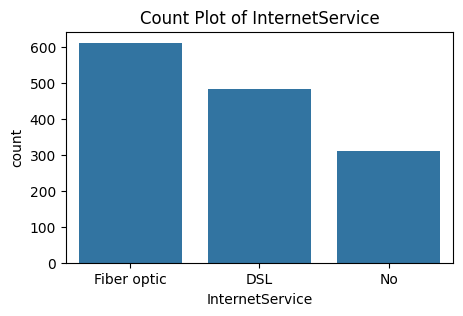

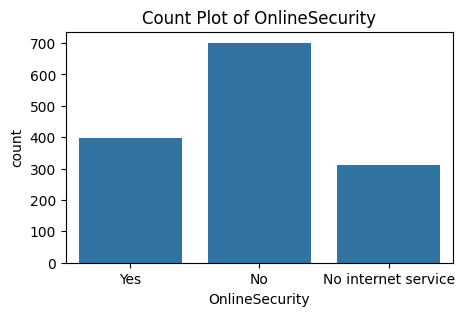

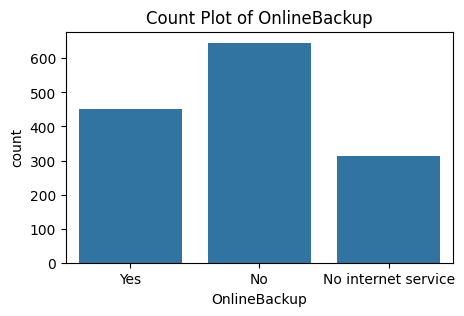

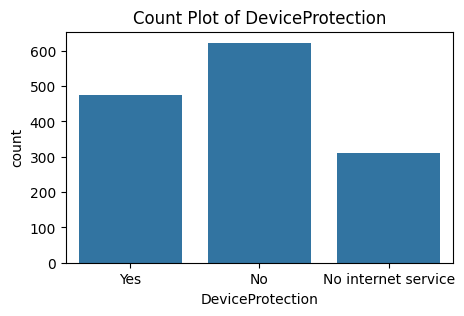

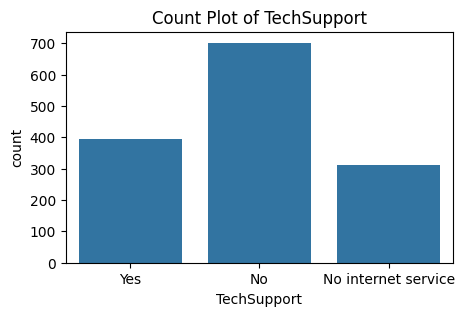

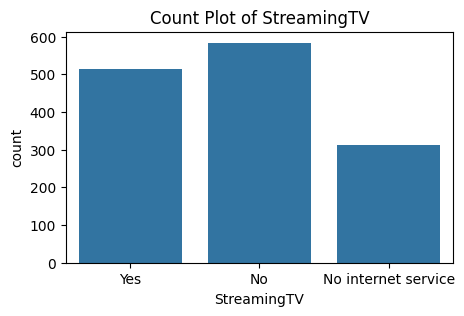

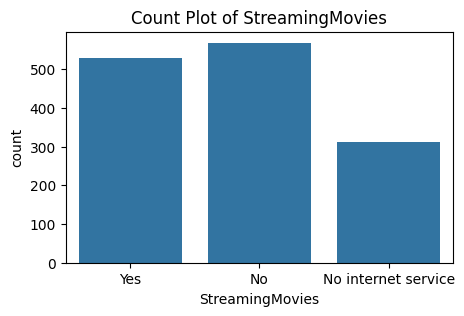

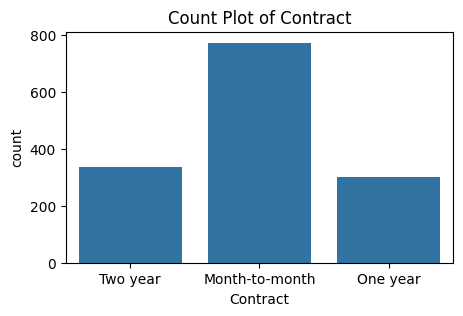

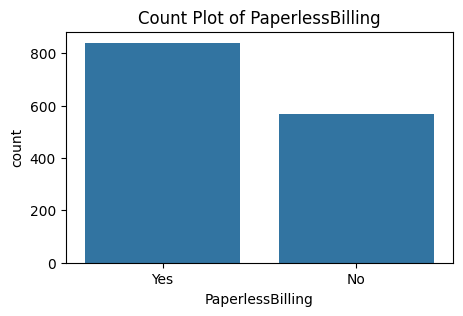

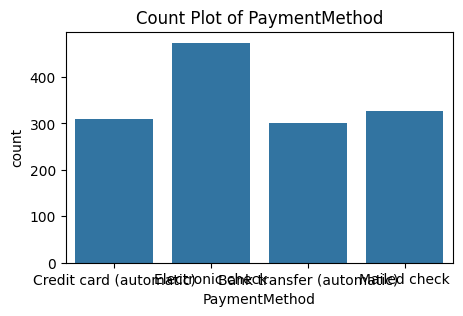

In [30]:
object_cols = df2.select_dtypes(include="object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df2[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

In [31]:
# identifying columns with object data type
object_columns = df2.select_dtypes(include="object").columns

In [ ]:
print(object_columns)

In [32]:
# initialize a dictionary to save the encoders
encoders2 = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df2[column] = label_encoder.fit_transform(df2[column])
  encoders2[column] = label_encoder


# save the encoders to a pickle file
with open("encoders2.pkl", "wb") as f:
  pickle.dump(encoders2, f)

In [ ]:
encoders2

In [ ]:
df2.head()

In [33]:
df2 = df2.drop(columns=['customerID'])

In [ ]:
df2.head()

In [34]:
X = df.drop(columns=['churned'])
y = df['churned']

In [35]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(y_train.shape)

In [ ]:
print(y_train.value_counts())

Synthetic Minority Oversampling technique(SMOTE)

In [36]:
smote = SMOTE(random_state=42)

In [37]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_smote.shape)

In [ ]:
print(y_train_smote.value_counts())

5. Model Training

traing with default hyperparameters

In [38]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [40]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.79
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.84
----------------------------------------------------------------------


In [41]:
cv_scores

{'Decision Tree': array([0.68863636, 0.72575758, 0.84090909, 0.84318182, 0.83484848]),
 'Random Forest': array([0.73939394, 0.76818182, 0.89469697, 0.90681818, 0.87424242]),
 'XGBoost': array([0.7219697 , 0.76893939, 0.89318182, 0.91212121, 0.88863636])}

In [75]:
rfc = RandomForestClassifier(random_state=42)

In [76]:
model.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [77]:
print(y_test.value_counts())

churned
0    839
1    288
Name: count, dtype: int64


6 . Model Evaluation

In [78]:
y_test_pred = model.predict(X_test)
print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report:\n",classification_report(y_test,y_test_pred))

Accuracy Score:
 0.7604259094942325
Confusion Matrix:
 [[699 140]
 [130 158]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       839
           1       0.53      0.55      0.54       288

    accuracy                           0.76      1127
   macro avg       0.69      0.69      0.69      1127
weighted avg       0.76      0.76      0.76      1127



In [85]:
# # save the trained model as a pickle file
# model_data = {"model": rfc, "features_names": X.columns.tolist()}


# with open("customer_churn_model.pkl", "wb") as f:
#   pickle.dump(model_data, f)
# Save the fitted model and feature names
# We are saving the 'model' variable which was fitted in cell 68.
# Based on your loop in cell 66 and the fit call in cell 68,
# 'model' holds the last model from the dictionary which is the XGBClassifier.
model_data = {"model": model, "features_names": X.columns.tolist()}

with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

7.Load the saved model and build a predict System

In [86]:
# # load teh saved model and the feature names

# with open("customer_churn_model.pkl", "rb") as f:
#   model_data = pickle.load(f)

# loaded_model = model_data["model"]
# feature_names = model_data["features_names"]
# If you want to save the RandomForestClassifier specifically
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_smote, y_train_smote) # Fit the model before saving

model_data = {"model": rfc, "features_names": X.columns.tolist()}

with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

In [87]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}
# %%
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model_instance in models.items(): # Changed variable name to avoid conflict
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model_instance, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)
# %%
cv_scores
# %%
# We will explicitly train the RandomForestClassifier to save it
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_smote, y_train_smote) # Fit the rfc model
# %%
# Now 'rfc' is the fitted RandomForestClassifier
# We can also evaluate it on the test set if needed
# print("Random Forest Test Evaluation:")
# y_test_pred_rfc = rfc.predict(X_test)
# print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred_rfc))
# print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred_rfc))
# print("Classification Report:\n",classification_report(y_test,y_test_pred_rfc))


print(y_test.value_counts())
# %% [markdown]
# 6 . Model Evaluation
# %%
# The previous evaluation was using the 'model' variable, which was the XGBClassifier
# Now, we'll evaluate the fitted 'rfc' (RandomForestClassifier)
y_test_pred = rfc.predict(X_test) # Use the fitted rfc model
print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report:\n",classification_report(y_test,y_test_pred))
# %%
# Save the fitted rfc model
model_data = {"model": rfc, "features_names": X.columns.tolist()}

with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.79
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.84
----------------------------------------------------------------------
churned
0    839
1    288
Name: count, dtype: int64
Accuracy Score:
 0.7843833185448092
Confusion Matrix:
 [[717 122]
 [121 167]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       839
           1       0.58      0.58      0.58       288

    accuracy                           0.78      1127
   macro avg       0.72      0.72      0.72      1127
weighted avg       0.78      0.78      0.78      1127



In [89]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [90]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [91]:
input_data = {
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 'No',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'No',
    'OnlineSecurity': 'No internet service',
    'OnlineBackup': 'No internet service',
    'DeviceProtection': 'No internet service',
    'TechSupport': 'No internet service',
    'StreamingTV': 'No internet service',
    'StreamingMovies': 'No internet service',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'No',
    'PaymentMethod': 'Mailed check',
    'MonthlyCharges': 20.5,
    'TotalCharges': 20.5
}


input_data_df = pd.DataFrame([input_data])

# Load the encoders
# Ensure you load the encoders trained on the training data ('encoders.pkl')
with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)

# encode categorical featires using the saved encoders
# Iterate through the columns in your input_data_df and encode if they exist in the encoders
for column in input_data_df.columns:
    if column in encoders:
        # Ensure the column is of object type before attempting to transform
        if input_data_df[column].dtype == 'object':
            input_data_df[column] = encoders[column].transform(input_data_df[column])


# make a prediction using the loaded_model
# The loaded_model was loaded in the previous cell

# --- Start of changes ---

# Load the saved model and the feature names
# This code was commented out in cell 86 but is needed here
with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

# --- End of changes ---


prediction = loaded_model.predict(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
# If your model supports predict_proba, you can also get probabilities
# try:
#     pred_proba = loaded_model.predict_proba(input_data_df)[:, 1] # Probability of the positive class (churn)
#     print(f"Prediction Probability: {pred_proba[0]:.4f}")
# except AttributeError:
#     print("Model does not support predict_proba.")

[1]
Prediction: Churn


In [93]:
# Load the test.csv file
df_test = pd.read_csv('test.csv')

# Preprocess the test data (same steps as for the training data)
# Handle " " in TotalCharges and convert to float
df_test["TotalCharges"] = df_test["TotalCharges"].replace({" ": "0.0"})
df_test["TotalCharges"] = df_test["TotalCharges"].astype(float)

# Ensure the 'SeniorCitizen' column is treated correctly if it's not already numeric
# Based on your previous code, you included it in the object_cols list for encoding
# but it's often an int (0 or 1). Let's convert it to object first if it's int,
# then encode it using the training encoders.

if df_test['SeniorCitizen'].dtype != 'object':
    df_test['SeniorCitizen'] = df_test['SeniorCitizen'].astype('object')


# Load the saved encoders *fitted on the training data*
# We need to use the encoders from 'encoders.pkl', not 'encoders2.pkl'
try:
    with open("encoders.pkl", "rb") as f:
      encoders_train = pickle.load(f)
except FileNotFoundError:
    print("Error: encoders.pkl not found. Please ensure you have run the cell to save the training encoders.")
    # You might want to exit or handle this error appropriately
    exit() # Or raise an error, depending on your workflow

# Identify categorical columns in the test data that need encoding
# Use the feature names from the training data to ensure consistency
categorical_cols_to_encode = [col for col in feature_names if df_test[col].dtype == 'object']
# Also include SeniorCitizen if it was encoded
if 'SeniorCitizen' in feature_names and df_test['SeniorCitizen'].dtype == 'object':
     if 'SeniorCitizen' not in categorical_cols_to_encode:
        categorical_cols_to_encode.append('SeniorCitizen')


# Encode categorical features in the test data using the loaded training encoders
for column in categorical_cols_to_encode:
  if column in df_test.columns and column in encoders_train:
    # Check if there are new categories in the test data not seen in training
    new_categories = set(df_test[column].unique()) - set(encoders_train[column].classes_)
    if new_categories:
        print(f"Warning: Column '{column}' contains new categories not seen in training: {new_categories}")
        # You might need a strategy to handle new categories (e.g., replace with a placeholder, ignore)
        # For simplicity here, we'll proceed but be aware this can cause errors if the encoder fails
        # on unseen data depending on its handling strategy. scikit-learn's LabelEncoder will raise an error.
        # A robust solution might involve using OneHotEncoder or a different LabelEncoder strategy.
        # For now, let's assume for simplicity that test data categories are a subset or identical.

    # Ensure the column is of object type before attempting to transform
    if df_test[column].dtype == 'object':
         # Transform the column using the corresponding encoder from the training set
        df_test[column] = encoders_train[column].transform(df_test[column])
    else:
        print(f"Warning: Column '{column}' was expected to be 'object' but is '{df_test[column].dtype}'. Skipping encoding.")
  elif column in df_test.columns and column not in encoders_train:
      print(f"Warning: Column '{column}' exists in test data but no corresponding encoder found in encoders.pkl.")
  elif column not in df_test.columns:
      print(f"Warning: Column '{column}' from training features is not in test data.")


# Drop the 'customerID' column from the test data as it's not used for prediction
# It's better to save the predictions and merge them back with the original df_test
# that still has customerID if you want customerID in the output file.
# Let's save the original df_test to merge predictions later
df_test_original = pd.read_csv('test.csv') # Load original again to keep customerID

# Process df_test (without customerID) for prediction
if 'customerID' in df_test.columns:
    df_test_processed = df_test.drop(columns=['customerID'])
else:
    df_test_processed = df_test.copy() # Copy if customerID was already dropped


# Ensure the order of columns in the processed test data matches the training data features
try:
    X_test_processed = df_test_processed[feature_names]
except KeyError as e:
    print(f"Error: Feature mismatch between training and test data. Missing column: {e}")
    print("Training features:", feature_names)
    print("Test data columns:", df_test_processed.columns.tolist())
    exit() # Or handle the error appropriately


# Make predictions on the preprocessed test data using the loaded model
# Ensure loaded_model is defined and loaded from the previous step
if 'loaded_model' in locals():
    test_predictions = loaded_model.predict(X_test_processed)

    # You can now view the predictions
    print("Test Predictions:", test_predictions)

    # Add the predictions back to the original test dataframe using customerID as index/key
    # Assuming the order of rows is the same, or you can merge on customerID
    # Simple approach: add the prediction column directly (assumes row order matches)
    df_test_original['predicted_churn'] = test_predictions

    print("\nTest data with predictions (first 5 rows):")
    print(df_test_original.head())

    # --- Start of changes ---

    # Save the dataframe with predictions to a new CSV file
    output_filename = 'test_predictions.csv'
    df_test_original.to_csv(output_filename, index=False) # index=False prevents writing the pandas index as a column

    print(f"\nTest data with predictions saved to {output_filename}")

    # --- End of changes ---

else:
    print("Error: loaded_model is not defined. Ensure the cell to load the model from the pickle file was run.")

Test Predictions: [0 1 0 ... 0 0 0]

Test data with predictions (first 5 rows):
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  4376-KFVRS    Male              0     Yes        Yes      72          Yes   
1  2754-SDJRD  Female              1      No         No       8          Yes   
2  9917-KWRBE  Female              0     Yes        Yes      41          Yes   
3  0365-GXEZS    Male              0     Yes         No      18          Yes   
4  9385-NXKDA  Female              0     Yes         No      72          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0           Yes     Fiber optic            Yes  ...              Yes   
1           Yes     Fiber optic             No  ...               No   
2           Yes             DSL            Yes  ...              Yes   
3            No     Fiber optic             No  ...              Yes   
4           Yes             DSL            Yes  ...              Yes   

  Tech

Top Features Influencing Churn (based on RandomForest Feature Importance):
MonthlyCharges      0.142931
TotalCharges        0.140455
Contract            0.127311
tenure              0.120076
TechSupport         0.085012
OnlineSecurity      0.080707
PaymentMethod       0.041702
OnlineBackup        0.040296
InternetService     0.029855
Dependents          0.026861
DeviceProtection    0.026107
Partner             0.024882
gender              0.022082
MultipleLines       0.020412
PaperlessBilling    0.018036
StreamingMovies     0.016942
StreamingTV         0.016137
SeniorCitizen       0.013744
PhoneService        0.006450
dtype: float64


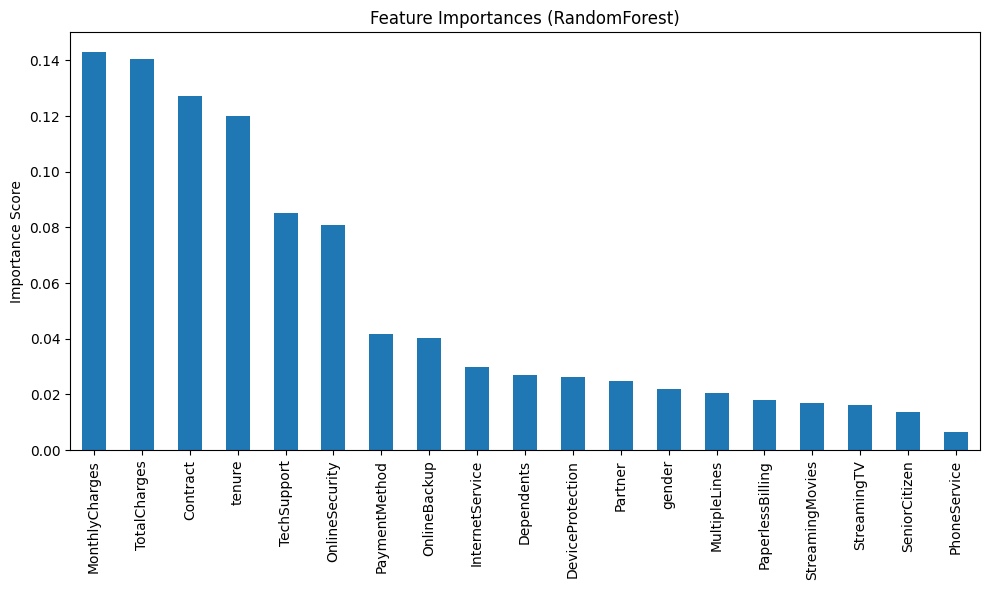

In [94]:
# Assuming you have already run the cell that loads the model:
# with open("customer_churn_model.pkl", "rb") as f:
#   model_data = pickle.load(f)
# loaded_model = model_data["model"]
# feature_names = model_data["feature_names"] # Ensure feature_names is loaded

if 'loaded_model' in locals() and 'feature_names' in locals():
    # Get feature importances from the fitted RandomForestClassifier
    importances = loaded_model.feature_importances_

    # Create a pandas Series for easier viewing and sorting
    feature_importances = pd.Series(importances, index=feature_names)

    # Sort the features by importance
    sorted_importances = feature_importances.sort_values(ascending=False)

    # Print the top features
    print("Top Features Influencing Churn (based on RandomForest Feature Importance):")
    print(sorted_importances)

    # Optional: Visualize feature importances
    plt.figure(figsize=(10, 6))
    sorted_importances.plot(kind='bar')
    plt.title("Feature Importances (RandomForest)")
    plt.ylabel("Importance Score")
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

else:
    print("Error: loaded_model or feature_names not found. Ensure the model loading cell was run.")

Calculating SHAP values for the test dataset...
SHAP values calculated.

SHAP Summary Plot (Global Feature Importance):


<Figure size 640x480 with 0 Axes>

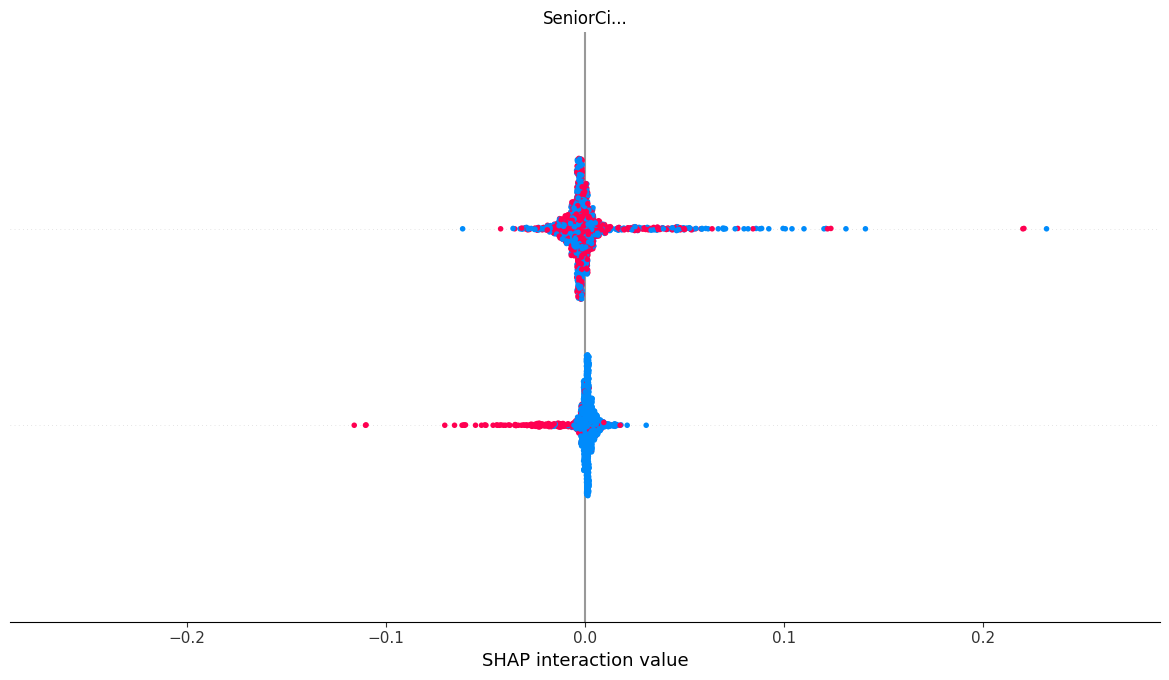


SHAP Explanation for Customer at Index 0 (in the test set):


DimensionError: Length of features is not equal to the length of shap_values!

In [95]:
!pip install shap

import shap

# Assuming X_train_smote (the training data the model was fitted on) is available
# If not, you might need to load it or use a representative sample of your data.
# SHAP needs the data used for fitting or a background dataset.

# For tree models, shap.TreeExplainer is recommended
explainer = shap.TreeExplainer(loaded_model)

# Calculate SHAP values for a subset of the data (e.g., the test set you predicted on)
# Note: Calculating SHAP values can be computationally intensive for large datasets.
# Let's calculate for the processed test set X_test_processed
if 'X_test_processed' in locals() and 'loaded_model' in locals():
    print("Calculating SHAP values for the test dataset...")
    shap_values = explainer.shap_values(X_test_processed)
    print("SHAP values calculated.")

    # --- Global Feature Importance with SHAP ---
    # This plot shows the average impact of each feature on the magnitude of the prediction
    print("\nSHAP Summary Plot (Global Feature Importance):")
    shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names)

    # --- Individual Prediction Explanation with SHAP ---
    # Let's explain the first customer in the test set (index 0)
    customer_index_to_explain = 0
    print(f"\nSHAP Explanation for Customer at Index {customer_index_to_explain} (in the test set):")

    # For binary classification, shap_values is a list [shap_values_class_0, shap_values_class_1]
    # We usually look at the SHAP values for the positive class (churn=1)
    shap.initjs() # Initialize JavaScript for interactive plots
    shap.force_plot(explainer.expected_value[1], shap_values[1][customer_index_to_explain,:], X_test_processed.iloc[customer_index_to_explain,:], feature_names=feature_names)

    # You can iterate through customers predicted to churn to see their specific reasons
    # For example, find indices where prediction is 1 in the test set
    # churn_indices = X_test_processed[loaded_model.predict(X_test_processed) == 1].index.tolist()
    # if churn_indices:
    #     print("\nExplaining first 3 customers predicted to churn:")
    #     for i, original_index in enumerate(churn_indices[:3]):
    #         # Find the row index in X_test_processed corresponding to the original index
    #         # This is tricky if X_test_processed was re-indexed.
    #         # A simpler way is to iterate the first few rows of X_test_processed that were predicted as churn.
    #         # Let's just explain the first 3 rows of X_test_processed predicted as churn.
    #         if loaded_model.predict(X_test_processed.iloc[[i]])[0] == 1:
    #              print(f"\nExplanation for row {i} (predicted churn):")
    #              shap.initjs()
    #              shap.force_plot(explainer.expected_value[1], shap_values[1][i,:], X_test_processed.iloc[i,:], feature_names=feature_names)


else:
     print("Error: X_test_processed or loaded_model not found. Ensure the previous cell for test prediction was run.")

Top Features Influencing Churn (based on RandomForest Feature Importance):
MonthlyCharges      0.142931
TotalCharges        0.140455
Contract            0.127311
tenure              0.120076
TechSupport         0.085012
OnlineSecurity      0.080707
PaymentMethod       0.041702
OnlineBackup        0.040296
InternetService     0.029855
Dependents          0.026861
DeviceProtection    0.026107
Partner             0.024882
gender              0.022082
MultipleLines       0.020412
PaperlessBilling    0.018036
StreamingMovies     0.016942
StreamingTV         0.016137
SeniorCitizen       0.013744
PhoneService        0.006450
dtype: float64


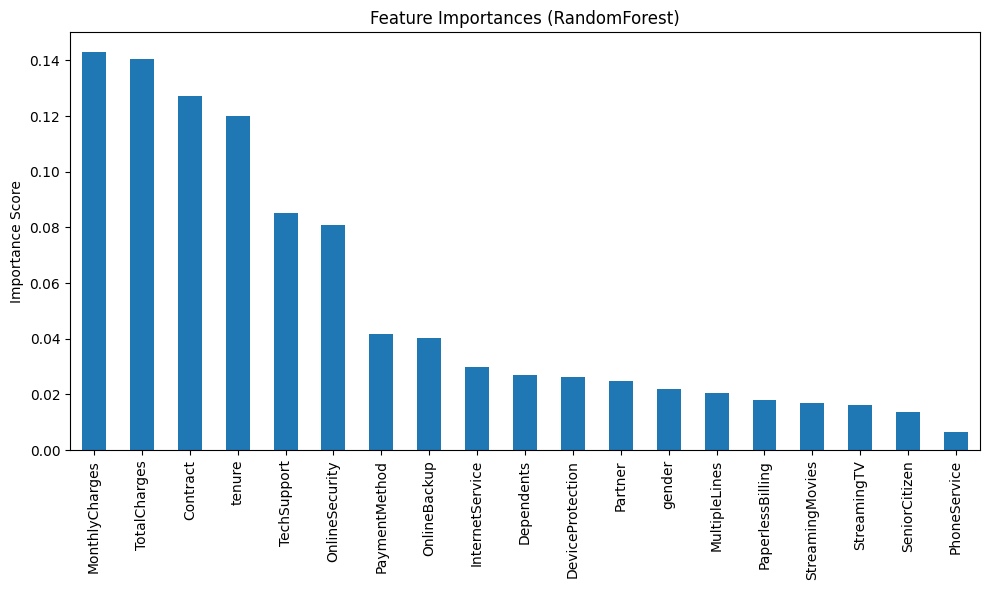

In [96]:
# Assuming you have already run the cell that loads the model:
# with open("customer_churn_model.pkl", "rb") as f:
#   model_data = pickle.load(f)
# loaded_model = model_data["model"]
# feature_names = model_data["feature_names"] # Ensure feature_names is loaded

if 'loaded_model' in locals() and 'feature_names' in locals():
    # Get feature importances from the fitted RandomForestClassifier
    # This section is for global importance, no changes needed here
    importances = loaded_model.feature_importances_

    # Create a pandas Series for easier viewing and sorting
    feature_importances = pd.Series(importances, index=feature_names)

    # Sort the features by importance
    sorted_importances = feature_importances.sort_values(ascending=False)

    # Print the top features
    print("Top Features Influencing Churn (based on RandomForest Feature Importance):")
    print(sorted_importances)

    # Optional: Visualize feature importances
    plt.figure(figsize=(10, 6))
    sorted_importances.plot(kind='bar')
    plt.title("Feature Importances (RandomForest)")
    plt.ylabel("Importance Score")
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

else:
    print("Error: loaded_model or feature_names not found. Ensure the model loading cell was run.")

In [97]:
!pip install shap

import shap

# Assuming X_train_smote (the training data the model was fitted on) is available
# If not, you might need to load it or use a representative sample of your data.
# SHAP needs the data used for fitting or a background dataset.

# For tree models, shap.TreeExplainer is recommended
# Check if the explainer was already created in a previous run
if 'explainer' not in locals() or explainer.model != loaded_model:
    print("Creating SHAP TreeExplainer...")
    explainer = shap.TreeExplainer(loaded_model)
    print("TreeExplainer created.")


# Calculate SHAP values for a subset of the data (e.g., the test set you predicted on)
# Note: Calculating SHAP values can be computationally intensive for large datasets.
# Let's calculate for the processed test set X_test_processed
if 'X_test_processed' in locals() and 'loaded_model' in locals():
    print("Calculating SHAP values for the test dataset...")
    # Ensure you have calculated shap_values for the test set
    # Check if shap_values is already calculated or if it needs recalculation
    if 'shap_values' not in locals() or shap_values.shape[0] != X_test_processed.shape[0]:
         shap_values = explainer.shap_values(X_test_processed)
         print("SHAP values calculated.")
    else:
        print("SHAP values already calculated for the test dataset.")


    # --- Global Feature Importance with SHAP ---
    # This plot shows the average impact of each feature on the magnitude of the prediction
    print("\nSHAP Summary Plot (Global Feature Importance):")
    # For binary classification, shap_values is a list [shap_values_class_0, shap_values_class_1]
    # Use the SHAP values for class 1 for the summary plot
    shap.summary_plot(shap_values[1], X_test_processed, feature_names=feature_names)

    # --- Individual Prediction Explanation with SHAP ---
    # Let's explain the first customer in the test set (index 0)
    customer_index_to_explain = 0
    print(f"\nSHAP Explanation for Customer at Index {customer_index_to_explain} (in the test set):")

    shap.initjs() # Initialize JavaScript for interactive plots

    # --- Start of change ---
    # Pass the feature values for the specific instance as a DataFrame row (using [[index]])
    shap.force_plot(explainer.expected_value[1], shap_values[1][customer_index_to_explain,:], X_test_processed.iloc[[customer_index_to_explain],:], feature_names=feature_names)
    # --- End of change ---


else:
     print("Error: X_test_processed or loaded_model not found. Ensure the previous cell for test prediction was run.")

Creating SHAP TreeExplainer...
TreeExplainer created.
Calculating SHAP values for the test dataset...
SHAP values already calculated for the test dataset.

SHAP Summary Plot (Global Feature Importance):


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [98]:
!pip install shap

import shap

# Assuming X_train_smote (the training data the model was fitted on) is available
# If not, you might need to load it or use a representative sample of your data.
# SHAP needs the data used for fitting or a background dataset.

# For tree models, shap.TreeExplainer is recommended
# Check if the explainer was already created in a previous run
if 'explainer' not in locals() or explainer.model != loaded_model:
    print("Creating SHAP TreeExplainer...")
    explainer = shap.TreeExplainer(loaded_model)
    print("TreeExplainer created.")


# Calculate SHAP values for a subset of the data (e.g., the test set you predicted on)
# Note: Calculating SHAP values can be computationally intensive for large datasets.
# Let's calculate for the processed test set X_test_processed
if 'X_test_processed' in locals() and 'loaded_model' in locals():
    print("Calculating SHAP values for the test dataset...")
    # Ensure you have calculated shap_values for the test set
    # Check if shap_values is already calculated or if it needs recalculation
    if 'shap_values' not in locals() or (isinstance(shap_values, list) and shap_values[0].shape[0] != X_test_processed.shape[0]) or (not isinstance(shap_values, list) and shap_values.shape[0] != X_test_processed.shape[0]):
         shap_values = explainer.shap_values(X_test_processed)
         print("SHAP values calculated.")
    else:
        print("SHAP values already calculated for the test dataset.")


    # --- Global Feature Importance with SHAP ---
    # This plot shows the average impact of each feature on the magnitude of the prediction
    print("\nSHAP Summary Plot (Global Feature Importance):")
    # For binary classification, shap_values is a list [shap_values_class_0, shap_values_class_1]
    # Use the SHAP values for class 1 for the summary plot
    # --- Start of change ---
    shap.summary_plot(shap_values[1], X_test_processed, feature_names=feature_names)
    # --- End of change ---


    # --- Individual Prediction Explanation with SHAP ---
    # Let's explain the first customer in the test set (index 0)
    customer_index_to_explain = 0
    print(f"\nSHAP Explanation for Customer at Index {customer_index_to_explain} (in the test set):")

    shap.initjs() # Initialize JavaScript for interactive plots

    # Pass the feature values for the specific instance as a DataFrame row (using [[index]])
    shap.force_plot(explainer.expected_value[1], shap_values[1][customer_index_to_explain,:], X_test_processed.iloc[[customer_index_to_explain],:], feature_names=feature_names)

    # You can iterate through customers predicted to churn to see their specific reasons
    # For example, find indices where prediction is 1 in the test set
    # churn_indices = X_test_processed[loaded_model.predict(X_test_processed) == 1].index.tolist()
    # if churn_indices:
    #     print("\nExplaining first 3 customers predicted to churn:")
    #     for i, original_index in enumerate(churn_indices[:3]):
    #         # Find the row index in X_test_processed corresponding to the original index
    #         # This is tricky if X_test_processed was re-indexed.
    #         # A simpler way is to iterate the first few rows of X_test_processed that were predicted as churn.
    #         # Let's just explain the first 3 rows of X_test_processed predicted as churn.
    #         if loaded_model.predict(X_test_processed.iloc[[i]])[0] == 1:
    #              print(f"\nExplanation for row {i} (predicted churn):")
    #              shap.initjs()
    #              shap.force_plot(explainer.expected_value[1], shap_values[1][i,:], X_test_processed.iloc[i,:], feature_names=feature_names)


else:
     print("Error: X_test_processed or loaded_model not found. Ensure the previous cell for test prediction was run.")

Creating SHAP TreeExplainer...
TreeExplainer created.
Calculating SHAP values for the test dataset...
SHAP values already calculated for the test dataset.

SHAP Summary Plot (Global Feature Importance):


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [100]:
!pip install shap

import shap

# Assuming X_train_smote (the training data the model was fitted on) is available
# If not, you might need to load it or use a representative sample of your data.
# SHAP needs the data used for fitting or a background dataset.

# For tree models, shap.TreeExplainer is recommended
# Check if the explainer was already created in a previous run
if 'explainer' not in locals() or explainer.model != loaded_model:
    print("Creating SHAP TreeExplainer...")
    explainer = shap.TreeExplainer(loaded_model)
    print("TreeExplainer created.")


# Calculate SHAP values for a subset of the data (e.g., the test set you predicted on)
# Note: Calculating SHAP values can be computationally intensive for large datasets.
# Let's calculate for the processed test set X_test_processed
if 'X_test_processed' in locals() and 'loaded_model' in locals():
    print("Calculating SHAP values for the test dataset...")
    # Ensure you have calculated shap_values for the test set
    # Check if shap_values is already calculated or if it needs recalculation
    # For binary classification, shap_values should be a list of two arrays.
    # Check the shape of the first array in the list.
    if 'shap_values' not in locals() or not isinstance(shap_values, list) or len(shap_values) != 2 or shap_values[0].shape[0] != X_test_processed.shape[0]:
         # Recalculate SHAP values
         shap_values = explainer.shap_values(X_test_processed)
         print("SHAP values calculated.")
    else:
        print("SHAP values already calculated for the test dataset.")


    # --- Global Feature Importance with SHAP ---
    # This plot shows the average impact of each feature on the magnitude of the prediction
    print("\nSHAP Summary Plot (Global Feature Importance):")
    # For binary classification, shap_values is a list [shap_values_class_0, shap_values_class_1]
    # Use the SHAP values for class 1 (index 1) for the summary plot, as it's the positive class ('Churn')
    shap.summary_plot(shap_values[1], X_test_processed, feature_names=feature_names)


    # --- Individual Prediction Explanation with SHAP ---
    # Let's explain the first customer in the test set (index 0)
    customer_index_to_explain = 0
    print(f"\nSHAP Explanation for Customer at Index {customer_index_to_explain} (in the test set):")

    shap.initjs() # Initialize JavaScript for interactive plots

    # Pass the feature values for the specific instance as a DataFrame row (using [[index]])
    # Use the SHAP values for class 1 (index 1) for the force plot as well
    shap.force_plot(explainer.expected_value[1], shap_values[1][customer_index_to_explain,:], X_test_processed.iloc[[customer_index_to_explain],:], feature_names=feature_names)

    # You can iterate through customers predicted to churn to see their specific reasons
    # For example, find indices where prediction is 1 in the test set
    # churn_indices = X_test_processed[loaded_model.predict(X_test_processed) == 1].index.tolist()
    # if churn_indices:
    #     print("\nExplaining first 3 customers predicted to churn:")
    #     for i, original_index in enumerate(churn_indices[:3]):
    #         # Find the row index in X_test_processed corresponding to the original index
    #         # This is tricky if X_test_processed was re-indexed.
    #         # A simpler way is to iterate the first few rows of X_test_processed that were predicted as churn.
    #         # Let's just explain the first 3 rows of X_test_processed predicted as churn.
    #         if loaded_model.predict(X_test_processed.iloc[[i]])[0] == 1:
    #              print(f"\nExplanation for row {i} (predicted churn):")
    #              shap.initjs()
    #              # Use SHAP values for class 1
    #              shap.force_plot(explainer.expected_value[1], shap_values[1][i,:], X_test_processed.iloc[i,:], feature_names=feature_names)


else:
     print("Error: X_test_processed or loaded_model not found. Ensure the previous cell for test prediction was run.")

Creating SHAP TreeExplainer...
TreeExplainer created.
Calculating SHAP values for the test dataset...
SHAP values calculated.

SHAP Summary Plot (Global Feature Importance):


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>